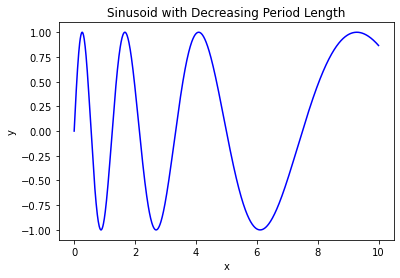

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. 生成一个每个周期的长度随周期数线性降低的正弦函数
x = np.linspace(0, 10, 1000)
# 计算频率，使其随周期数线性降低
frequency = 1/(0.2 * x + 1)
y = np.sin(2 * np.pi * frequency * x)

# 可视化生成的正弦函数
plt.plot(x, y,color = 'blue')
plt.title('Sinusoid with Decreasing Period Length')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('original.png',transparent = True)
plt.show()


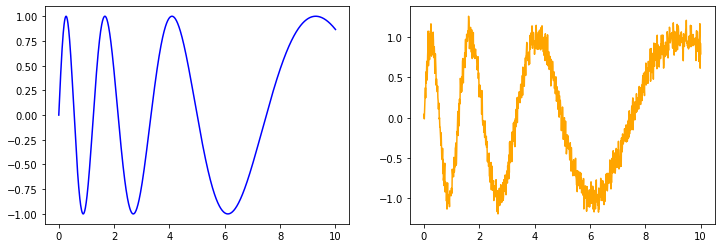

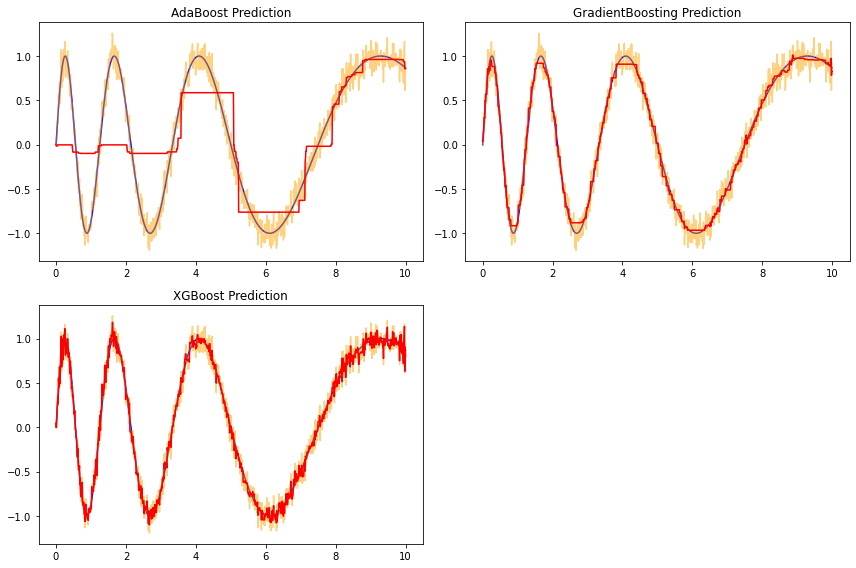

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 2. 加入一些噪音
noise = np.random.normal(0, 0.1, y.shape)
y_noisy = y + noise

# 可视化原始数据和带噪声的数据
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Original',color = 'blue')
plt.subplot(1, 2, 2)
plt.plot(x, y_noisy, label='Noisy', color='orange')
#plt.legend()
plt.savefig("noise-orig.png",transparent = True)
plt.show()

# 3. 分别使用AdaBoost、Gradient Boost，XGBoost对其进行拟合
models = {
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items(), start=1):
    model.fit(x.reshape(-1, 1), y_noisy)
    y_pred = model.predict(x.reshape(-1, 1))

    plt.subplot(2, 2, i)
    plt.title(f"{name} Prediction")
    plt.plot(x, y, label='Original',color = 'blue')
    plt.plot(x, y_noisy, label='Noisy', color='orange', alpha=0.5)
    plt.plot(x, y_pred, color='red')
    #plt.legend()

plt.tight_layout()
plt.savefig('predict.png',transparent = True)
plt.show()
